<a href="https://colab.research.google.com/github/MEloisa/clase-git/blob/master/Fashion_Mnist_Tensorflow_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""Flattening: The process of converting a 2d image into 1d vector
ReLU: An activation function that allows a model to solve nonlinear problems
Softmax: A function that provides probabilities for each possible output class
Classification: A machine learning model used for distinguishing among two or more output categories"""

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.2.0)


In [2]:
from __future__ import absolute_import, division,print_function

In [3]:
#import Tensorflow and Tensorflow Datasets

import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#improve progress bar display

In [6]:
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [7]:
print(tf.__version__)

2.4.1


In [8]:
tf.executing_eagerly()

True

In [9]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True,with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [10]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
#Explore the data

In [12]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

In [13]:
print("Number of trainning examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of trainning examples: 60000
Number of test examples: 10000


In [14]:
#Preprocess the data

In [15]:
def normalize(images,labels):
  images= tf.cast(images,tf.float32)
  images /= 255
  return images, labels

In [16]:
train_dataset= train_dataset.map(normalize)
test_dataset= test_dataset.map(normalize)

In [17]:
#Explore the preprocessed data

In [18]:
#take a single image and rehsape to delete the color dimension

In [19]:
for image, label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))

In [20]:
#plot the image

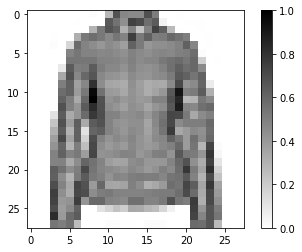

In [21]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

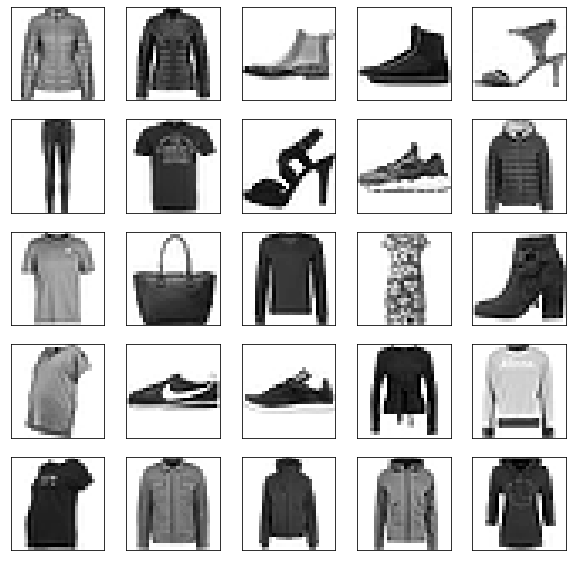

In [22]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel=class_names[label]
  i+=1
plt.show()

In [23]:
#Build the model

In [24]:
model= tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28,1)),
                              tf.keras.layers.Dense(128,activation=tf.nn.relu),
                              tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                          ])

In [25]:
#Flatten convert 2d array to 1d array
#Dense layer of 126 neurons
#Dense, 10 outputs - 10 clothing Classses

In [26]:

#Compile the model with loss and optimizer functions

model.compile(loss='sparse_categorical_crossentropy',metrics= ['Accuracy'],optimizer='adam')

In [27]:
#Train the model

In [28]:
#1. Repeat
#2. Shuffle to randomizes the order
#3. size of the batches of images and labels when updating the model variables

In [29]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [30]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


ValueError: ignored